# Week 1 

In [ ]:
# week 1 
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm

# generate 100 experiments
n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma = 1


# generate 1 experiments - just for the understanding
experiments_sti = np.random.normal(mu_s, sigma, (n_trials))
experiments_nosti = np.random.normal(mu_s0, sigma, (n_trials))
c_unb, c_b_yes, c_b_no = 0.5, 0.3, 0.7


In [ ]:
# computing the d's
c_unb, c_b_yes, c_b_no = 0.5, 0.3, 0.7

n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma = 1

N_s = 50
N_s0 = 50

d_prime_unb = []
d_prime_b_yes = []
d_prime_b_no = []

for c in [c_unb, c_b_yes,c_b_no ]:
    
    for i in range(100):
        n_tp = sum(np.random.normal(mu_s, sigma, (n_trials)) > c)
        n_fp = sum(np.random.normal(mu_s0, sigma, (n_trials)) > c)

        if c == c_unb:
            d_prime_unb.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_yes:
            d_prime_b_yes.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_no:
            d_prime_b_no.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))



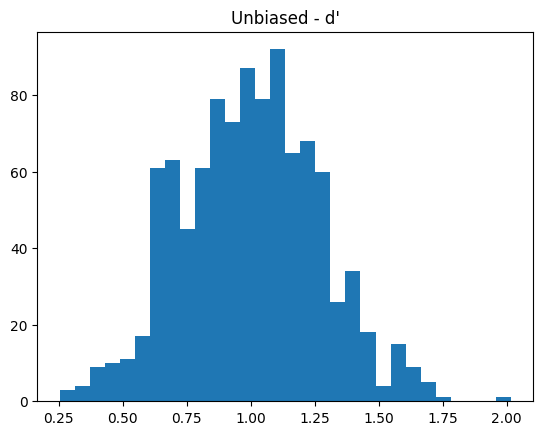

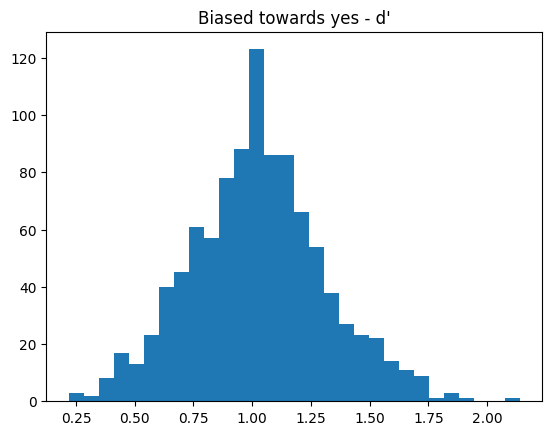

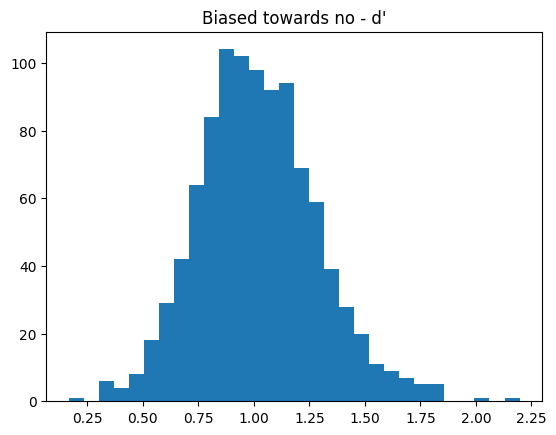

1.0062855676644165 1.0251238905695668 1.0204403633640535


In [ ]:

plt.hist(d_prime_unb, bins=30)
plt.title("Unbiased - d'")

plt.show()

plt.hist(d_prime_b_yes, bins=30)
plt.title("Biased towards yes - d'")

plt.show()

plt.hist(d_prime_b_no, bins=30)
plt.title("Biased towards no - d'")

plt.show()
print(np.mean(d_prime_unb), np.mean(d_prime_b_yes), np.mean(d_prime_b_no ))


# Lower var

In [ ]:
c_unb, c_b_yes, c_b_no = 0.5, 0.3, 0.7

n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma = 0.8

# todo 
sigma_s0=1

N_s = 50
N_s0 = 50

d_prime_unb = []
d_prime_b_yes = []
d_prime_b_no = []

for c in [c_unb, c_b_yes,c_b_no ]:
    
    for i in range(100):
        n_tp = sum(np.random.normal(mu_s, sigma, (n_trials)) > c)
        n_fp = sum(np.random.normal(mu_s0, sigma_s0, (n_trials)) > c)

        if c == c_unb:
            d_prime_unb.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_yes:
            d_prime_b_yes.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))
        elif c == c_b_no:
            d_prime_b_no.append(norm.ppf(n_tp/N_s)-norm.ppf(n_fp/N_s))



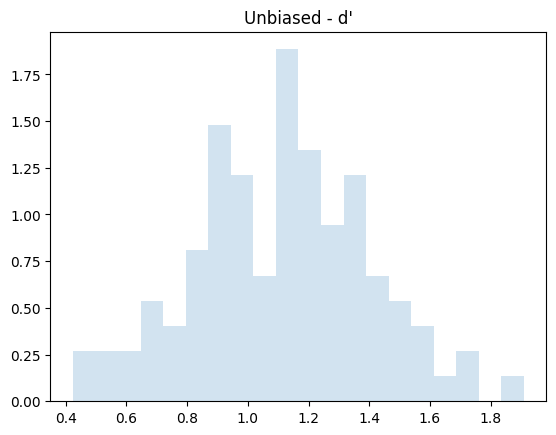

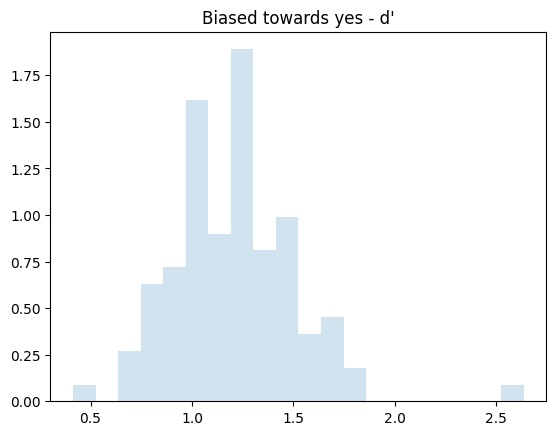

Text(0.5, 1.0, "Biased towards no - d'")

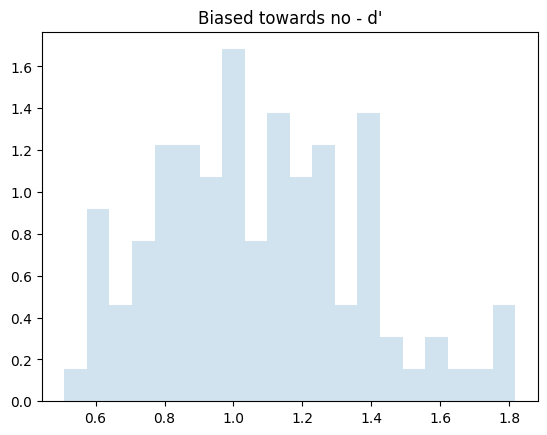

In [ ]:



# plt.hist(d_prime_unb, bins=20)
plt.hist(d_prime_unb, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.title("Unbiased - d'")
plt.show()
# plt.hist(d_prime_b_yes, bins=20)
plt.hist(d_prime_b_yes, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.title("Biased towards yes - d'" )

plt.show()
# plt.hist(d_prime_b_no, bins=20)
plt.hist(d_prime_b_no, density=True, histtype='stepfilled', alpha=0.2, bins=20)
plt.title("Biased towards no - d'")


In [ ]:
print(np.mean(d_prime_unb), np.mean(d_prime_b_yes), np.mean(d_prime_b_no ))

1.110389143728549 1.2105208172063824 1.0779498264817726


## Week 2

### Parameter estimation

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
from scipy.stats import norm
import matplotlib.pyplot as plt

In [ ]:
def parameter_esti(c, samples_stim, samples_nostim, N_trials):
    n_highno_nostim = sum(samples_nostim < c[0])
    n_highno_stim = sum(samples_stim < c[0])
    n_lowno_nostim = len(samples_nostim[np.logical_and(samples_nostim>=c[0],samples_nostim<c[1])])
    n_lowno_stim = len(samples_stim[np.logical_and(samples_stim>=c[0],samples_stim<c[1])])
    n_lowyes_nostim = len(samples_nostim[np.logical_and(samples_nostim>=c[1],samples_nostim<c[2])])
    n_lowyes_stim = len(samples_stim[np.logical_and(samples_stim>=c[1],samples_stim<c[2])])
    n_highyes_nostim = sum(samples_nostim > c[2])
    n_highyes_stim = sum(samples_stim > c[2])
    print("probability of High_no given no stimulus:", n_highno_nostim/N_trials)
    print("probability of High_no given stimulus:", n_highno_stim/N_trials)
    print("probability of Low_no given no stimulus:", n_lowno_stim/N_trials)
    print("probability of Low_no given stimulus:", n_lowno_nostim/N_trials)
    print("probability of Low_yes given no stimulus:", n_lowyes_nostim/N_trials)
    print("probability of Low_yes given stimulus:", n_lowyes_stim/N_trials)
    print("probability of High_yes given no stimulus:", n_highyes_nostim/N_trials)
    print("probability of High_yes given stimulus:", n_highyes_stim/N_trials)
    print("probability of Yes given no stimulus:", (n_highyes_nostim+n_lowyes_nostim)/N_trials)
    print("probability of Yes given stimulus:", (n_highyes_stim+n_lowyes_stim)/N_trials)
    print("probability of No given no stimulus:", (n_highno_nostim+n_lowno_nostim)/N_trials)
    print("probability of No given stimulus:", (n_highno_stim+n_lowno_stim)/N_trials)
    #return n_highno_nostim, n_lowno_nostim, n_lowyes_stim, n_highyes_stim

probability of High_no given no stimulus: 0.46
probability of High_no given stimulus: 0.14
probability of Low_no given no stimulus: 0.1
probability of Low_no given stimulus: 0.18
probability of Low_yes given no stimulus: 0.16
probability of Low_yes given stimulus: 0.22
probability of High_yes given no stimulus: 0.2
probability of High_yes given stimulus: 0.54
probability of Yes given no stimulus: 0.36
probability of Yes given stimulus: 0.76
probability of No given no stimulus: 0.64
probability of No given stimulus: 0.24


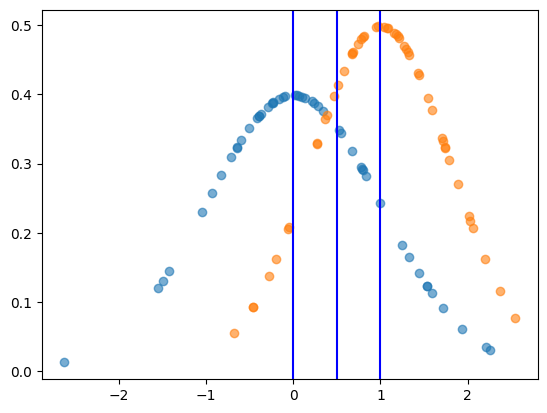

In [ ]:
mu_s0 = 0
mu_s = 1
sigma_s0 = 1
sigma_s = 0.8
n_trials = 50
n_experiments = 100
c_1 = 0
c_2 = 0.5
c_3 = 1

samples_nostim = np.random.normal(mu_s0, sigma_s0, n_trials)
samples_stim = np.random.normal(mu_s, sigma_s, n_trials)
parameter_esti([c_1, c_2, c_3], samples_stim, samples_nostim, n_trials)

fig, ax = plt.subplots(1, 1)
ax.plot(samples_nostim, norm.pdf(samples_nostim, mu_s0, sigma_s0), 'o', ms=6, alpha=0.6, label='yes')
ax.plot(samples_stim, norm.pdf(samples_stim, mu_s, sigma_s), 'o', ms=6, alpha=0.6, label='yes')

c=0.5 #criterion
c_high=1 #high
c_low=0 #low
plt.axvline(x=c, color = 'b')
plt.axvline(x=c_high, color = 'b')
plt.axvline(x=c_low, color = 'b')
plt.show()

### Estimating c

Equation 1.8 in Lecturenotes week2:
$$\phi^{-1} (P(r=yes|s_{0})) = -c$$

In [ ]:
def estimate_c(c, mu_s0, sigma_s0, n_trials, n_experiments):
    cs = []
    for i in range(n_experiments):
        samples_nostim = np.random.normal(mu_s0, sigma_s0, n_trials)
        nfp = sum(samples_nostim > c)
        c_est = norm.ppf(nfp/n_trials)
        cs.append(-c_est)
    return np.mean(cs)

In [ ]:
estimate_c(c_1, mu_s0, sigma_s0, n_trials, n_experiments)

-0.012671377021401128

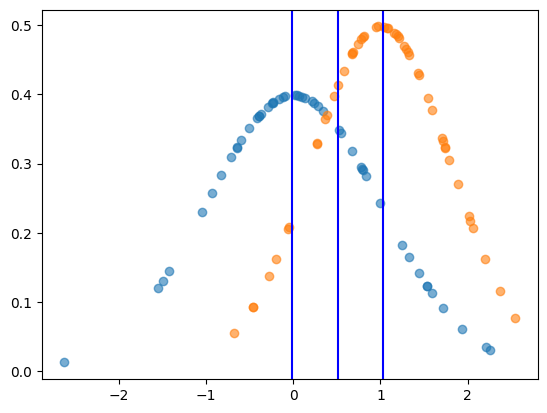

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(samples_nostim, norm.pdf(samples_nostim, mu_s0, sigma_s0), 'o', ms=6, alpha=0.6, label='yes')
ax.plot(samples_stim, norm.pdf(samples_stim, mu_s, sigma_s), 'o', ms=6, alpha=0.6, label='yes')

c=estimate_c(c_2, mu_s0, sigma_s0, n_trials, n_experiments) #criterion
c_high=estimate_c(c_3, mu_s0, sigma_s0, n_trials, n_experiments) #high
c_low=estimate_c(c_1, mu_s0, sigma_s0, n_trials, n_experiments) #low
plt.axvline(x=c, color = 'b')
plt.axvline(x=c_high, color = 'b')
plt.axvline(x=c_low, color = 'b')
plt.show()

# Katrines proposal for code week 2

I think we are to estimate the mu's and the sigmas

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

n_experiments = 100
n_trials = 50

# mu_s = 1
# mu_s0 = 0
# sigma_s = 0.8
# sigma_s0 = 1

# setting the criterions as 0.8, 0.5 and 0.2

# C1: yes = yes_high (meaning data points above 0.8),          no = everything else  
# C2: yes = yes_high + yes_low  (meaning above 0.5) ,          no = no_high + no_low 
# C3: yes = yes_high + yes_low + no_low  (meaning above 0.2),  no = no_high 

sigma_list = []
mu_list = []

In [ ]:

for i in range(n_experiments):
    stim_choices = np.random.normal(1, 0.8,50)
    no_stim_choices = np.random.normal(0, 1 ,50)

    yes_high_s =    sum([1 if i >= 0.8 else 0 for i in stim_choices])
    yes_low_s =     sum([1 if i < 0.8 and i > 0.5 else 0 for i in stim_choices])
    no_low_s =      sum([1 if i > 0.2 and i <= 0.5 else 0 for i in stim_choices])
    no_high_s =     sum([1 if i <= 0.2 else 0 for i in stim_choices])

    yes_high_s0 =   sum([1 if i >= 0.8 else 0 for i in no_stim_choices])
    yes_low_s0 =    sum([1 if i < 0.8 and i > 0.5 else 0 for i in no_stim_choices])
    no_low_s0 =     sum([1 if i > 0.2 and i <= 0.5 else 0 for i in no_stim_choices])
    no_high_s0 =    sum([1 if i <= 0.2 else 0 for i in no_stim_choices])


    tp_c1 = yes_high_s /n_trials
    tp_c2 = (yes_high_s + yes_low_s) /n_trials
    tp_c3 = (yes_high_s + yes_low_s + no_low_s) /n_trials
    # these are the one axis of the ROC curve


    fp_c1 = yes_high_s0 /n_trials
    fp_c2 = (yes_high_s0 + yes_low_s0) /n_trials
    fp_c3 = (yes_high_s0 + yes_low_s0 + no_low_s0) /n_trials
    # these are the one axis of the ROC curve


    y= np.array([norm.pdf(tp_c1), norm.pdf(tp_c2), norm.pdf(tp_c3)])
    x= np.array([norm.pdf(fp_c1), norm.pdf(fp_c2), norm.pdf(fp_c3)]).reshape((-1,1))


    
    # so the x's are all from the no stimuli and they are false positives 
    # the y's are all from the stimuli data and are the true positives. 


    # By fitting the linear probit transformed ROC curve we can estimate its slope 1/σ and 
    # its intercept μs/σ .

    model = LinearRegression().fit(x, y)
    intercept, slope = model.intercept_, model.coef_[0]

    sigma = 1/slope
    mu_ses = sigma*intercept

    sigma_list.append(sigma)
    mu_list.append(mu_ses)


    # just a thought: should we do some kind of AUC as it is stated that this is a 
    # better measure for perceptual sensitivity than the d' ?




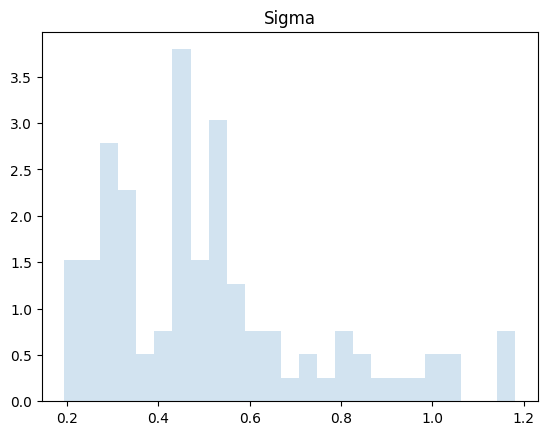

In [ ]:
plt.hist(sigma_list, density=True, histtype='stepfilled', alpha=0.2, bins = 25)
plt.title("Sigma")
plt.show()

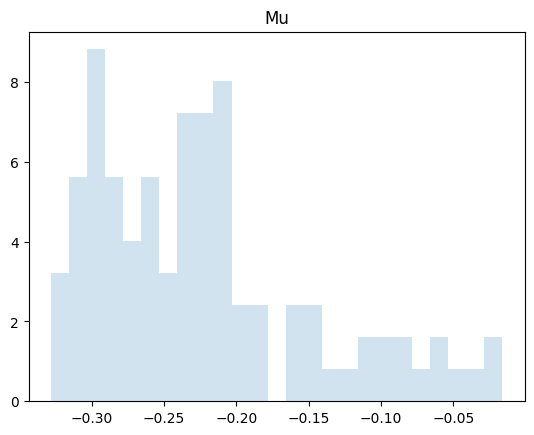

In [ ]:
plt.hist(mu_list, density=True, histtype='stepfilled', alpha=0.2, bins=25)
plt.title("Mu")
plt.show()

## TODO: 

COmpare these results with the ones we found in exercise 1.2.3 from week 1. 

# Psychometric function

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats import norm

# In a 3-alternative classification task, the observer classifies speech sounds under varying sound intensities.
# The experiment consists of 30 experimental trials at each sound intensity. The sound intensities and
# the corresponding number of correct responses are shown in the table below.


# Plot the psychometric function for the observer. The psy. func. is used to quantify an observer’s perceptual
# ability in this type of tasks.

import numpy as np
import sympy
from sympy import *                   # load all math functions
# init_printing( use_latex='mathjax' )  # use pretty math output

N_r = 30
n_participants = 1

stimulus_intensity = [5, 10, 15, 20, 25, 30] 
I_s = np.array(stimulus_intensity)
number_of_correct_responses = [12, 11, 19, 27, 30, 30] 
N_c = np.array(number_of_correct_responses)
P_c = N_c/N_r
#P_guess = 1/N_r
P_guess = 1/3

# 1.11
# P_yes_given_I = norm.ppf(I_s-c/sigma)


In [ ]:
# Fit the high threshold model in Equation 1.12 and the psychometric function in Equation 1.11 to the data.

# equation 1.12
# P_c(I_s) = P_tilde_c(I_s) +(1 − P_tilde_c (I_s)) P_guess
# P_tilde_c (I_s) = the proportion correct after correcting for quessing.



# P_tilde_c = (P_c - P_guess)/(1 - P_guess)
# # equation 1.12
# equation_1_12 = sympy.Eq( P_c, P_tilde_ces + (1 - P_tilde_ces) * P_guess )




# P_tilde_c is the true underlying psycometric function

# we will fit equation 1.12 to the experimental data and use the parameter estinmates to quantify the observer's perceptual 
# sensitivity and response criterion. 

# P_c[1]


In [ ]:
from sympy import symbols, Eq, solve
P_tilde_ces = []
x = symbols('x')
# expr = Eq(x + (1 - x) * P_guess - P_c[1],0)

for experiment in range(len(stimulus_intensity)):
    expr = Eq(x + (1 - x) * P_guess - P_c[experiment],0)
    P_tilde_ces.append(solve(expr))

# solve(P_c[1] == x + (1 - x) * P_guess , x)
# solve(equation_1_12 , x)

In [ ]:
# thr_model = LinearRegression().fit(P_tilde_ces, psychometric_function)
# is this what we are soposed to do?
P_tilde_ces, P_c

([[0.100000000000000],
  [0.0500000000000000],
  [0.450000000000000],
  [0.850000000000000],
  [1.00000000000000],
  [1.00000000000000]],
 array([0.4       , 0.36666667, 0.63333333, 0.9       , 1.        ,
        1.        ]))

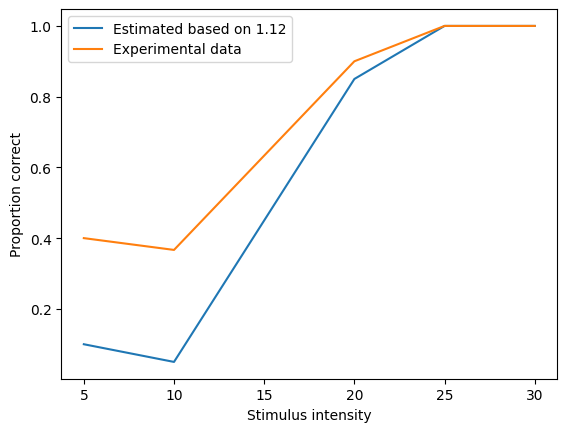

In [ ]:

# Plot the estimated x

# plt.plot(P_tilde_ces, P_c)
from cProfile import label


plt.plot(stimulus_intensity, P_tilde_ces, label= 'Estimated based on 1.12')
plt.plot(stimulus_intensity, P_c, label = 'Experimental data')
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct')
plt.legend()
plt.show()

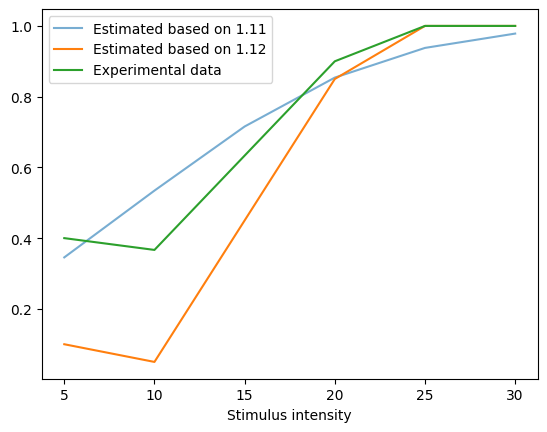

In [ ]:
data = np.array([stimulus_intensity, N_c/30])

mu, std = norm.fit(data)

resul = []
for i in range(len(stimulus_intensity)):
    res = norm.cdf(stimulus_intensity[i], mu, std)
    resul.append(res)

plt.plot(stimulus_intensity, resul,  alpha=0.6, label='Estimated based on 1.11')
plt.plot(stimulus_intensity, P_tilde_ces, label= 'Estimated based on 1.12')
plt.plot(stimulus_intensity, P_c, label = 'Experimental data')
plt.xlabel('Stimulus intensity')
# plt.ylabel('Proportion correct')
plt.legend()
plt.show()


# Week 3

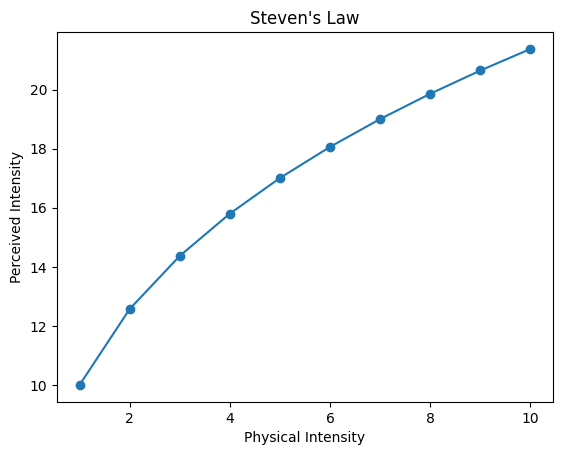

In [ ]:
# calculate the perceived stimulus intensity, Ip, for physical intensities 
# Is = 1, 2, . . . , 10 using Steven’s law.

import numpy as np
import matplotlib.pyplot as plt

# define the function
def Ip(Is,a):
    return 10*Is**(a)

# define the range of Is
Is = np.arange(1,11)

# calculate the perceived stimulus intensity
Ip = Ip(Is,0.33)

# plot the results
plt.plot(Is, Ip, 'o-')
plt.xlabel('Physical Intensity')
plt.ylabel('Perceived Intensity')
plt.title('Steven\'s Law')
plt.show()



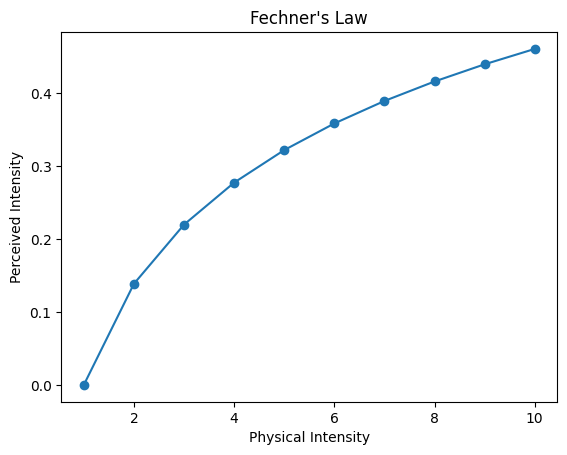

In [ ]:
# This simulates an observer that rates the perceived intensity according 
# to Stevens’ law. Fit Fechner’s law to the simulated data. 
# Note that Fechner’s law is linear with respect to Is.

# define the function
def fechner(Is,c, I0):
    return (1/c)*np.log(Is/I0)

I0=Is[0]
c = 5 #??
Ip = fechner(Is,c,I0)

# plot the results
plt.plot(Is, Ip, 'o-')
plt.xlabel('Physical Intensity')
plt.ylabel('Perceived Intensity')
plt.title('Fechner\'s Law')
plt.show()



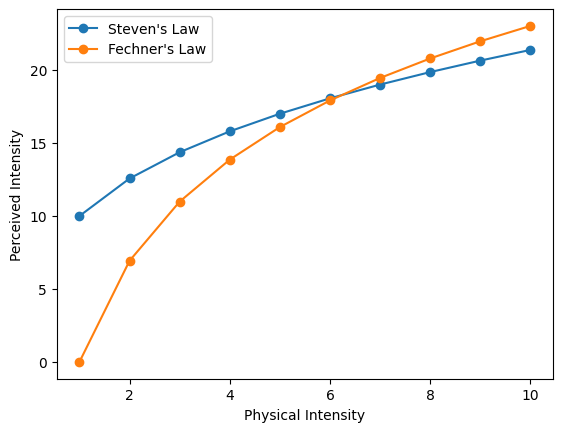

In [ ]:
# calculate the perceived stimulus intensity, Ip, for physical intensities 
# Is = 1, 2, . . . , 10 using Steven’s law.

import numpy as np
import matplotlib.pyplot as plt

# define the function
def Ip(Is,a):
    return 10*Is**(a)

# define the range of Is
Is = np.arange(1,11)

# calculate the perceived stimulus intensity
Ip = Ip(Is,0.33)

# plot the results
plt.plot(Is, Ip, 'o-',label='Steven\'s Law')


# This simulates an observer that rates the perceived intensity according 
# to Stevens’ law. Fit Fechner’s law to the simulated data. 
# Note that Fechner’s law is linear with respect to Is.

# define the function
def fechner(Is,c, I0):
    return (1/c)*np.log(Is/I0)

I0=Is[0]
c = 0.1 #??
Ip = fechner(Is,c,I0)

# plot the results
plt.plot(Is, Ip, 'o-', label='Fechner\'s Law')
plt.xlabel('Physical Intensity')
plt.ylabel('Perceived Intensity')
plt.legend()
plt.show()

TODO: how do we set c? should c be estimated?

In [ ]:
#List the parameter values for Fechner’s law
Is = np.arange(1,11)
I0=Is[0]
c = 0.1 #??
Ip = fechner(Is,c,I0)
i=0
for i in Is:
    Is= [i]
    Ip=fechner(i,c,I0)
    print(i, "->", Ip.round())
    i+=1

1 -> 0.0
2 -> 7.0
3 -> 11.0
4 -> 14.0
5 -> 16.0
6 -> 18.0
7 -> 19.0
8 -> 21.0
9 -> 22.0
10 -> 23.0


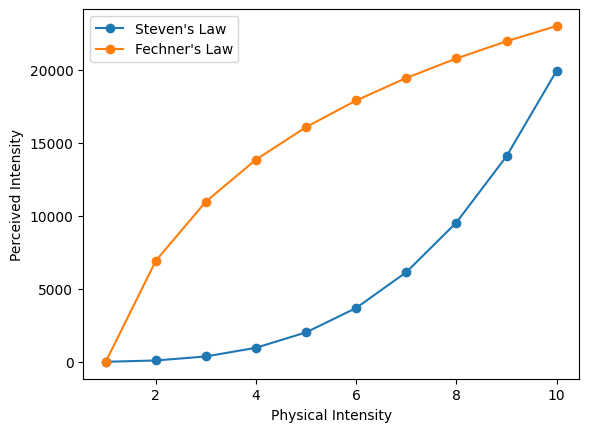

In [ ]:
#part 2 of magnitude

import numpy as np
import matplotlib.pyplot as plt

# define the function
def Ip(Is,a):
    return 10*Is**(a)

# define the range of Is
Is = np.arange(1,11)

# calculate the perceived stimulus intensity
Ip = Ip(Is,3.3)

# plot the results
plt.plot(Is, Ip, 'o-',label='Steven\'s Law')


# This simulates an observer that rates the perceived intensity according 
# to Stevens’ law. Fit Fechner’s law to the simulated data. 
# Note that Fechner’s law is linear with respect to Is.

# define the function
def fechner(Is,c, I0):
    return (1/c)*np.log(Is/I0)

I0=Is[0]
c = 0.0001 #??
Ip = fechner(Is,c,I0)

# plot the results
plt.plot(Is, Ip, 'o-', label='Fechner\'s Law')
plt.xlabel('Physical Intensity')
plt.ylabel('Perceived Intensity')
plt.legend()
plt.show()

In [ ]:
#List the parameter values for Fechner’s law
Is = np.arange(1,11)
I0=Is[0]
c = 0.0001 #??
Ip = fechner(Is,c,I0)
i=0
for i in Is:
    Is= [i]
    Ip=fechner(i,c,I0)
    print(i, "->", Ip.round())
    i+=1

1 -> 0.0
2 -> 6931.0
3 -> 10986.0
4 -> 13863.0
5 -> 16094.0
6 -> 17918.0
7 -> 19459.0
8 -> 20794.0
9 -> 21972.0
10 -> 23026.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0153691c-15dd-4c7c-b94c-78660e6bf471' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>